In [ ]:
## Many Models have adapoted the OPENAI Specification

In [ ]:
litlellm_model=LiteLLM(model_id="gpt-3.5-turbo")

In [ ]:
## Single Agent

In [ ]:
## API Agents

In [ ]:
hfapi_model=HfApiModel(model_id="Qwen/Qwen2.5-Coder-32b-Instruct")
## create the agent
hfapi_agent=CodeAgent(tool=[],model=hfapi_model,add_base_tools=True,verbosity_level=2)
hfapi_agent.run("Who is Adam")
print(hfapi_agent.logs[0].system_prompt)

In [ ]:
## OpenAI API Specifications

In [ ]:
litellm_model=LiteLLM(model_id="anthropic/claude-3-5-haiku-latest")
## create the agent
litellm_agent=CodeAgent(tool=[],model=litellm_model,add_base_tools=True,verbosity_level=2)
## launch the agent
litellm_agent.run("Who is Adam")

In [ ]:
## ollama

In [ ]:
## define the model
ollama_model=LiteLLM(model_id="ollama_chat/llama3.2:1b",api_base="http://localhost:11434")
## create the agent
ollama_agent=CodeAgent(tool=[],model=ollama_model,add_base_tools=True,verbosity_level=2)
ollama_agent.run("could you give me the 4th number in the fibbnoaci number")


In [ ]:
## define the model
transformer_model=TransformerModel(model_id="meta-llama/Llama-3.2-3b-Instruct")
## create the agent
agent=CodeAgent(tool=[],model=transformer_model,add_base_tools=True,additional_authorized_import=["numpy"])
agent.run("Find eigen values of : [[4,2],[1,1]]")



In [ ]:
## Tools

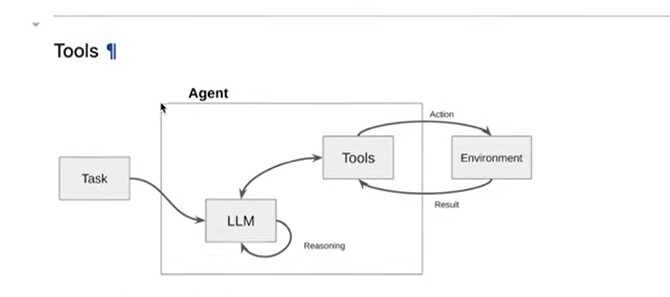

In [ ]:
from PIL import Image
Image.open(r'/content/tools.jpg')

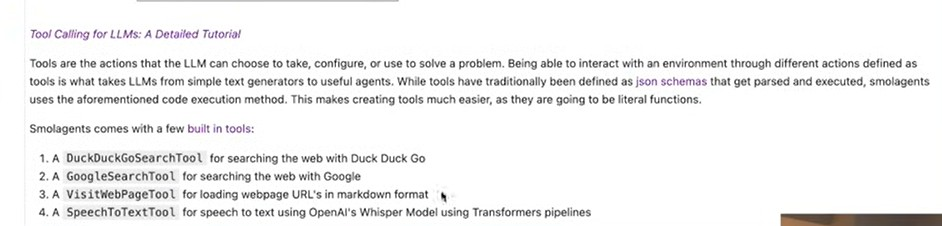

In [ ]:
Image.open(r'/content/tools_1.jpg')

In [ ]:
from re import search
search_tool=DuckDuckGoSearchTool()
print(search_tool.run("How many dunkins are there in MD"))

In [ ]:
## Tool Decorator

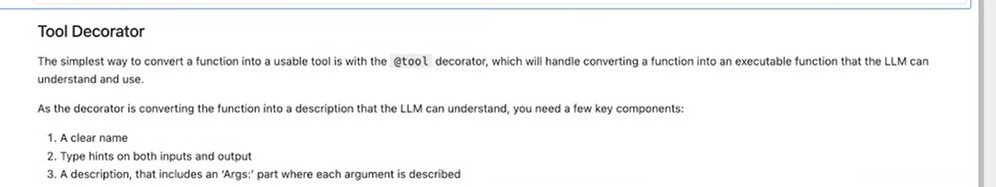

In [ ]:
Image.open(r'/content/tool_decorator.jpg')

In [ ]:
Image.open(r'/content/tool_decorator.jpg')

In [ ]:
def convert_currency(amount, from_currency, to_currency):
  url=f''
  response=reques.get(url)
  rates=response.json()[from_currency.lower()]
  converted=amount*rates[to_currency.lower()]
  return round(converted,2)

In [ ]:
result=convert_currency(100,"USD","INR")
print(result)

In [ ]:
iMAGE

In [ ]:
## SUBCLASS TOOL

In [ ]:
class convert_currency(Tool):
  name="convert_currency_2"
  description="Cobvert an amount from one currency to a different"
  inputs={'amount':{'type':'number','description'},'from_currency':{'type':'string','description'},'to_currency':{'type':'string','description'}}
  outputs={'amount':{'type':'number','description'}}
  output_type="number"
  def forward(self,amount,from_currency,to_currency):
    url=f''
    response=reques.get(url)
    rates=response.json()[from_currency.lower()]
    converted=amount*rates[to_currency.lower()]
    return round(converted,2)


In [ ]:
currency_convereter=convert_currency()
currency_convereter.forward(100,'USD','INR')

In [ ]:
## Demonstration

In [ ]:
from inspect import currentframe
currency_convereter=convert_currency()
model=HfApiModel(model_id="Qwen/Qwen2.5-Coder-32b-Instruct")
agent=CodeAgent(tools=[currency_convereter],model=model,add_base_tools=True)
## launch the agent
agent.run("what is 500 USD IN INR")

In [ ]:
## Tools from Hugging Face

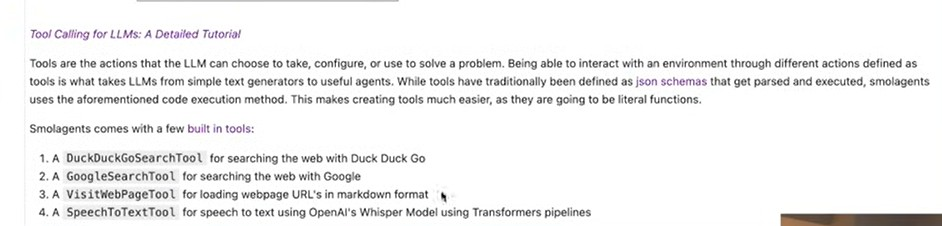

In [ ]:
from PIL import Image
Image.open(r'/content/tools_1.jpg')

In [ ]:
model=HfApiModel(model_id="Qwen/Qwen2.5-Coder-32b-Instruct")
agent=CodeAgent(tools=[image_generation_tool,display_image],model=model,add_base_tools=True)
## launch the agent
agent.run("generate an image of a green basketball and show it to the user")

In [ ]:
## Plannig

In [ ]:
## Image

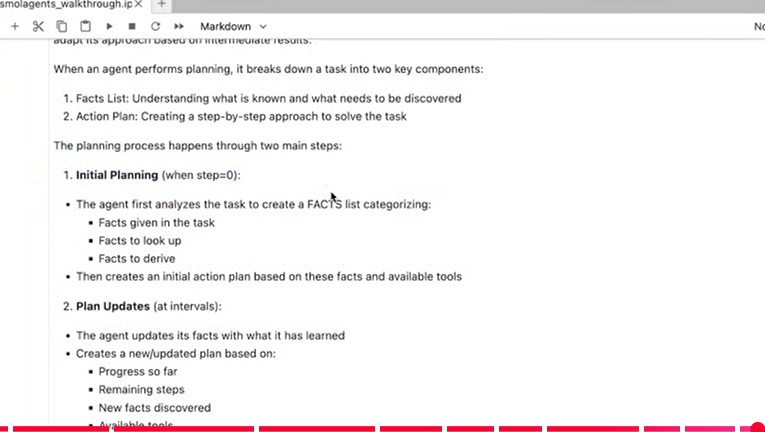

In [ ]:
from PIL import Image
Image.open(r'/content/planning_1.jpg')

In [ ]:
model=HfApiModel(model_id="Qwen/Qwen2.5-Coder-32b-Instruct")
curreny_converter=convert_currency()
agent=CodeAgent(tools=[image_generation_tool,display_image],model=model,add_base_tools=True)
agent.run("Geneate and display two images of the current rate of dollars to INR on a whiteboard","and another of the current rate of Dollar to INR on a chalk board")

In [ ]:
## Multi Agent

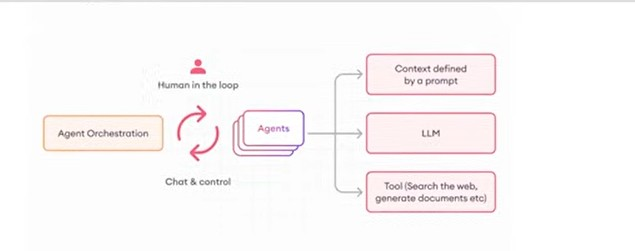

In [ ]:
Image.open(r'/content/multi_agents.jpg')

In [ ]:
model=HfApiModel(model_id="Qwen/Qwen2.5-Coder-32b-Instruct")
## CURRENCY CONVERTER AGENT
curreny_converter_agent=CodeAgent(tools=[convert_currency],model=model,add_base_tools=True)
managed_currency_agent=ManagedAgent(agents=[curreny_converter_agent],verbosity_level=2,description="Convert currency agent")
## Image generation agent
image_generation_agent=CodeAgent(tools=[image_generation_tool,display_image],model=model,add_base_tools=True)
managed_image_agent=ManagedAgent(agents=[image_generation_agent],verbosity_level=2,description="Generate and display images")
## Manager Agent
manager_agent=ManagedAgent(agents=[managed_currency_agent,managed_image_agent],verbosity_level=2,description="Manager Agent")
manager_agent.run("Generate and display two images of the current rate of dollars to INR on a whiteboard","and another of the current rate of Dollar to INR on a chalk board")

In [ ]:
## Gradio: Provides frontend for our agents

In [ ]:
## Define the model
model=HfApiModel(model_id="Qwen/Qwen2.5-Coder-32b-Instruct")
## Load the tool
currency_converter=convert_currency()
## Create the agent
agent=CodeAgent(tools=[currency_converter],model=model,add_base_tools=True)
## Launch the Gradio Interface
GradioInterface(agent).launch()

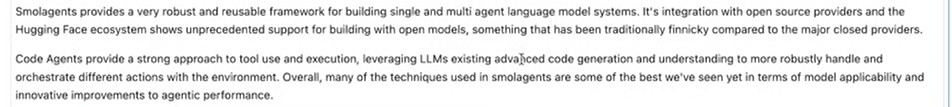

In [ ]:
# from PIL import Image
Image.open(r'/content/smol_agents.jpg')